In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import cm
from IPython.display import HTML
from mpl_toolkits.axisartist.axislines import SubplotZero
# %matplotlib notebook #av en eller annen grunn er notebook raskere enn inline

In [3]:
def ModLJ(r, R, epsilon): #R=radius of particle, epsilon=depth of potential well
    return epsilon*(2*((R/r)**6) - 3*((R/r)**4))

def superEllipse(theta, a, b, N):
    return (np.abs(np.cos(theta)/a)**N+np.abs(np.sin(theta)/b)**N)**(-1/N)

In [4]:
def plotForce():
    [NP, R, DT, samples, XI, wall, EPS, RP]=np.loadtxt("Info.txt")
    NP=int(NP)
    samples=int(samples)
    wall=int(wall)
    fil=np.loadtxt("Utvikling.txt").reshape(samples, NP, 4)
    filf=np.loadtxt("Kraft.txt").reshape(samples, NP, 2)
    fx=np.zeros(samples)
    fy=np.zeros(samples)
    for i in range(samples):
        fx[i]=np.sum(filf[i,:, 0])
        fy[i]=np.sum(filf[i,:, 1])
    plt.plot(np.sqrt(fx**2+fy**2))
    plt.xlabel("Tid")
    plt.ylabel("Sum kraft")
    plt.title(f"Sum kraft per tid, NP={NP}, DT={DT}, XI={XI}, Wall={wall}, EPS={EPS}")
    plt.show()

def plotLJ():
    [NP, R, DT, samples, XI, wall, EPS, RP]=np.loadtxt("Info.txt")
    NP=int(NP)
    samples=int(samples)
    wall=int(wall)
    r=np.linspace(0, 3, 100)
    plt.plot(r, ModLJ(r, RP, EPS))
    plt.xlabel("r")
    plt.ylabel("Lennard Jones")
    plt.ylim(-EPS, EPS)
    plt.grid()
    plt.title(f"LJ pot, NP={NP}, DT={DT}, XI={XI}, Wall={wall}, EPS={EPS}")
    plt.show()

def plotKinE():
    [NP, R, DT, samples, XI, wall, EPS, RP]=np.loadtxt("Info.txt")
    NP=int(NP)
    samples=int(samples)
    wall=int(wall)
    filf=np.loadtxt("Kraft.txt").reshape(samples, NP, 2)
    E_k=np.zeros(samples)
    for i in range(samples):
        E_k[i]=0.5*np.sum(filf[i,:, 0]**2+filf[i,:, 1]**2) #Assume mas of particles is 1
    plt.plot(E_k)
    plt.xlabel("t")
    plt.ylabel("E_k")
    plt.grid()
    plt.title(f"sum of E_k, NP={NP}, DT={DT}, XI={XI}, Wall={wall}, EPS={EPS}")
    plt.show()


In [5]:
def findMinSep():
    [NP, R, DT, samples, XI, wall, EPS, RP]=np.loadtxt("Info.txt")
    NP=int(NP)
    samples=int(samples)
    wall=int(wall)
    fil=np.loadtxt("Utvikling.txt").reshape(samples, NP, 4)
    filf=np.loadtxt("Kraft.txt")
    minsep=np.ones(samples)*(2*R)
    for i in range(samples):
        for j in range(NP):
            for k in range(NP):
                if j!=k:
                    if np.sqrt((fil[i, j, 0]-fil[i, k, 0])**2+(fil[i, j, 1]-fil[i, k, 1])**2)<minsep[i]:
                        minsep[i]=np.sqrt((fil[i, j, 0]-fil[i, k, 0])**2+(fil[i, j, 1]-fil[i, k, 1])**2)
            # minsep[i, j]=np.min(np.sqrt((fil[i, j, 0]-fil[i, :, 0])**2+(fil[i, j, 1]-fil[i, :, 1])**2))
    plt.plot(minsep)
    plt.xlabel("t")
    plt.ylabel("minsep")
    plt.grid()
    plt.title(f"minsep, NP={NP}, DT={DT}, XI={XI}, Wall={wall}, EPS={EPS}")
    plt.show()

In [6]:
def findDist():
    [NP, R, DT, samples, XI, wall, EPS, RP]=np.loadtxt("Info.txt")
    NP=int(NP)
    samples=int(samples)
    wall=int(wall)
    fil=np.loadtxt("Utvikling.txt").reshape(samples, NP, 4)
    for i in range(NP):
        for j in range(NP):
            if i!=j:
                print(np.sqrt((fil[-1, i, 0]-fil[-1, j, 0])**2 +(fil[-1, i, 1]-fil[-1, j, 1])**2)/(2*1.196828))


In [7]:
def findMeanRadius(config):
    [NP, R, DT, RPev, a, b, N]=np.loadtxt(f"startconfigs/Info{config}.txt")
    NP=int(NP)
    fil=np.loadtxt(f"startconfigs/{config}.txt").reshape(NP, 4)
    r=0
    for i in range(NP):
        r+=fil[i, 3]
    return r/NP

In [11]:
findMeanRadius("Config15")

1.5719151000000016

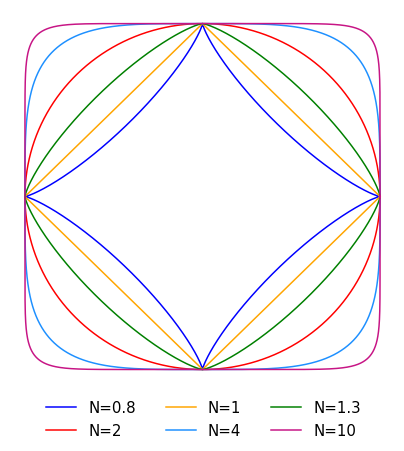

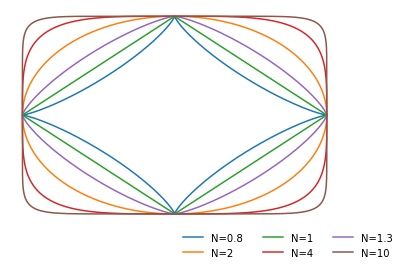

In [32]:
theta = np.linspace(0, 2*np.pi, 100000)
N = [0.8, 2, 1, 4, 1.3, 10]
colors = ["blue", "red", "orange", "dodgerblue","green", "mediumvioletred"]
plt.figure(figsize=[7, 7])
for i in range(len(N)):
    plt.plot(superEllipse(theta, 1, 1, N[i])*np.cos(theta), superEllipse(theta, 1, 1, N[i])*np.sin(theta), label=f"N={N[i]}", color=colors[i])
plt.axis('off')
plt.legend(frameon=False, ncol=int(len(N)/2), bbox_to_anchor=(0.94, 0), fontsize = 15)
plt.savefig("superEllipse.pdf")
plt.show()

plt.figure()
for i in N:
    R = superEllipse(theta, 100, 1, i)
    plt.plot(R*np.cos(theta), R*np.sin(theta), label=f"N={i}")
plt.axis('off')
plt.legend(frameon=False, ncol=int(len(N)/2), bbox_to_anchor=(1.18, 0))
plt.show()

<ipython-input-48-6e1ff17aa054>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(["","-1", "-0.75", "-0.5", "-0.25","", "0.25", "0.5", "0.75", "1"])
<ipython-input-48-6e1ff17aa054>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(["","-1", "-0.75", "-0.5", "-0.25","0", "0.25", "0.5", "0.75", "1"])


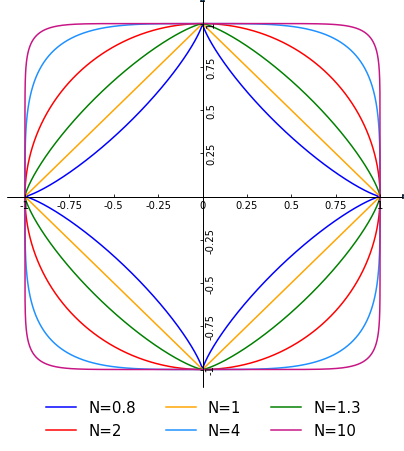

In [48]:
fig = plt.figure(figsize=[7, 7])
theta = np.linspace(0, 2*np.pi, 100000)
a=1
b=1
N = [0.8, 2, 1, 4, 1.3, 10]
colors = ["blue", "red", "orange", "dodgerblue","green", "mediumvioletred"]
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

theta = np.linspace(0, 2*np.pi, 100000)
ax.yaxis.set_ticklabels(["","-1", "-0.75", "-0.5", "-0.25","", "0.25", "0.5", "0.75", "1"])
ax.xaxis.set_ticklabels(["","-1", "-0.75", "-0.5", "-0.25","0", "0.25", "0.5", "0.75", "1"])
# ax.set_ylim(-EPS, EPS)
for i in range(len(N)):
    R = superEllipse(theta, 1, 1, N[i])
    ax.plot(R*np.cos(theta), R*np.sin(theta), label=f"N={N[i]}",color=colors[i])
ax.legend(frameon=False, ncol=int(len(N)/2), bbox_to_anchor=(0.94, 0), fontsize = 15)
plt.savefig("superEllipse.svg")
plt.show()

<ipython-input-1-6e4a54d71a8b>:2: RuntimeWarning: divide by zero encountered in true_divide
  return epsilon*(2*((R/r)**6) - 3*((R/r)**4))
<ipython-input-1-6e4a54d71a8b>:2: RuntimeWarning: invalid value encountered in subtract
  return epsilon*(2*((R/r)**6) - 3*((R/r)**4))


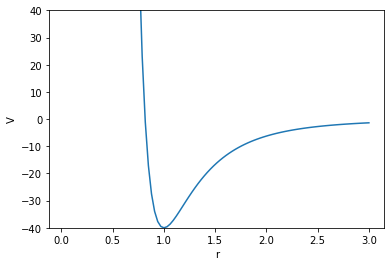

In [7]:
RP=1
EPS=40
r=np.linspace(0, 3, 100)
plt.plot(r, ModLJ(r, RP, EPS))
plt.xlabel("r")
plt.ylabel("V")
plt.ylim(-EPS, EPS)
plt.show()

<ipython-input-1-6e4a54d71a8b>:2: RuntimeWarning: divide by zero encountered in true_divide
  return epsilon*(2*((R/r)**6) - 3*((R/r)**4))
<ipython-input-1-6e4a54d71a8b>:2: RuntimeWarning: invalid value encountered in subtract
  return epsilon*(2*((R/r)**6) - 3*((R/r)**4))


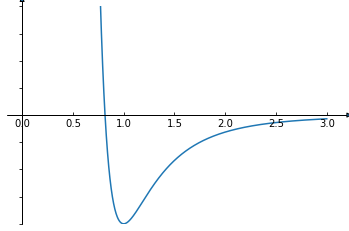

In [8]:
fig = plt.figure()
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

RP=1
EPS=40
r=np.linspace(0, 3, 1000)
ax.yaxis.set_ticklabels([])
ax.set_ylim(-EPS, EPS)
ax.plot(r, ModLJ(r, RP, EPS))
plt.show()


In [9]:
findMinSep()

<ipython-input-5-8e5f93805913>:2: UserWarning: loadtxt: Empty input file: "Info.txt"
  [NP, R, DT, samples, XI, wall, EPS, RP]=np.loadtxt("Info.txt")


ValueError: not enough values to unpack (expected 8, got 0)

# Force plots

In [10]:
plotForce()

<ipython-input-4-d6ce2ba91d92>:2: UserWarning: loadtxt: Empty input file: "Info.txt"
  [NP, R, DT, samples, XI, wall, EPS, RP]=np.loadtxt("Info.txt")


ValueError: not enough values to unpack (expected 8, got 0)

In [11]:
plotForce()

<ipython-input-4-d6ce2ba91d92>:2: UserWarning: loadtxt: Empty input file: "Info.txt"
  [NP, R, DT, samples, XI, wall, EPS, RP]=np.loadtxt("Info.txt")


ValueError: not enough values to unpack (expected 8, got 0)

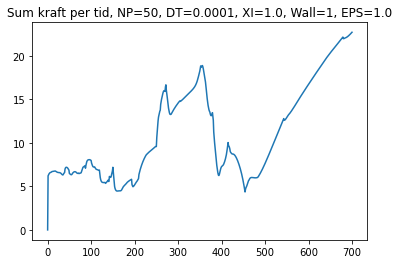

In [37]:
plotForce()

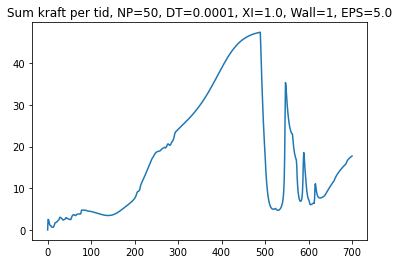

In [39]:
plotForce()

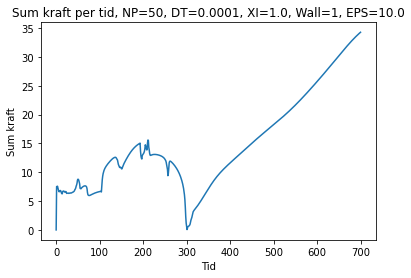

In [45]:
plotForce()

# Lennard Jones plots

<ipython-input-2-6e4a54d71a8b>:2: RuntimeWarning: divide by zero encountered in true_divide
  return epsilon*(2*((R/r)**6) - 3*((R/r)**4))
<ipython-input-2-6e4a54d71a8b>:2: RuntimeWarning: invalid value encountered in subtract
  return epsilon*(2*((R/r)**6) - 3*((R/r)**4))


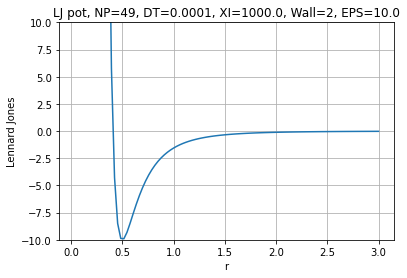

In [6]:
plotLJ()

# Kinetic energy plot

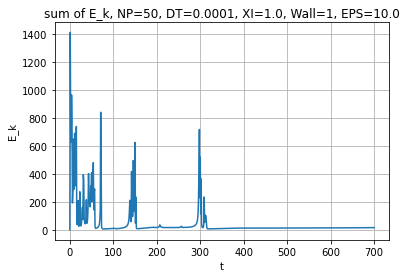

In [91]:
plotKinE()